In [1]:
#loading necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#loading carprice dataset
car = pd.read_csv('CarPrice.csv')

#view few records
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3]:
# check the summary statistics
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
# changing all the columns to lowercase
car.columns = car.columns.str.lower()
car.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### 1. Data Cleaning and transformation

There are few categorical columns that needs to be converted to numeric

In [5]:
# remove car id as it is just an identifier
car.drop('car_id',axis=1, inplace=True)
car.shape

(205, 25)

In [6]:
# symboling is categorical with +3 indicates risky and -3 indicates safe. So it is ordinal. No change in that variable
car.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
# car name has the make + model. Extract the make from the car name
car['make']= car['carname'].apply(lambda x: x.split(' ',1)[0])

#Drop carname which is not required now
car.drop('carname',axis=1, inplace=True)
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
# There are duplicates in car names. Remove the duplicates
print (car.make.value_counts())

def namechange(x):
    if x == "toyouta": return "toyota"
    if x == "maxda": return "mazda"
    if (x == "vw") | (x == "vokswagen"): return "volkswagen"
    if x == "porcshce": return "porsche"
    return x.lower()


car['make'] = car.make.apply(namechange)
print(car.make.value_counts())

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
maxda           2
vw              2
renault         2
vokswagen       1
porcshce        1
mercury         1
toyouta         1
Nissan          1
Name: make, dtype: int64
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: make, dtype: int64


In [9]:
#check fuel type column
print (car.fueltype.value_counts())

#add new column to indicate fueltype gas or not
car['fueltype_gas'] = car.fueltype.map({"gas":1, "diesel":0})

#drop fueltype column
car.drop('fueltype',axis=1, inplace=True)

car.head()

gas       185
diesel     20
Name: fueltype, dtype: int64


,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,fueltype_gas
0,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1
1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1
2,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1
3,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1
4,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1


In [10]:
#check aspiration column
car.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [11]:
# converting aspiration columns into two columns
car['aspiration_std'] = car.aspiration.map({"std":1, "turbo":0})

#dropping car aspiration column
car.drop('aspiration',axis=1, inplace=True)
car.head()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,fueltype_gas,aspiration_std
0,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1
1,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1
2,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1
3,2,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,3.40,10.0,102,5500,24,30,13950.0,audi,1,1
4,2,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,3.40,8.0,115,5500,18,22,17450.0,audi,1,1


In [12]:
#check doornumber column
car.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [13]:
# converting doornumber columns into numeric
car['doornumber'] = car.doornumber.map({"four":4, "two":2})

car.head()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,fueltype_gas,aspiration_std
0,3,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1
1,3,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1
2,1,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1
3,2,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,3.40,10.0,102,5500,24,30,13950.0,audi,1,1
4,2,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,3.40,8.0,115,5500,18,22,17450.0,audi,1,1


In [14]:
# check carbody column
print(car.carbody.value_counts())

print ("car shape before: ",car.shape)

#let us convert this column  using 'one hot encoding'
car_carbody = pd.get_dummies(car.carbody)
# print (car_carbody.head())
print ("Encoded data shape:",car_carbody.shape)

car = pd.concat([car,car_carbody],axis=1)

#drop carbody column
car.drop('carbody',axis=1,inplace=True)

print ("car shape: after",car.shape)

car.head()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
car shape before:  (205, 25)
Encoded data shape: (205, 5)
car shape: after (205, 29)


,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,highwaympg,price,make,fueltype_gas,aspiration_std,convertible,hardtop,hatchback,sedan,wagon
0,3,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,27,13495.0,alfa-romero,1,1,1,0,0,0,0
1,3,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,27,16500.0,alfa-romero,1,1,1,0,0,0,0
2,1,2,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,26,16500.0,alfa-romero,1,1,0,0,1,0,0
3,2,4,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,30,13950.0,audi,1,1,0,0,0,1,0
4,2,4,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,22,17450.0,audi,1,1,0,0,0,1,0


In [15]:
# check drivewheel column 
print (car.drivewheel.value_counts())

print ("car shape before: ",car.shape)

#let us convert this column  using 'one hot encoding'
car_drivwheel = pd.get_dummies(car.drivewheel)
# print (car_drivewheel.head())
print ("Encoded data shape:",car_drivwheel.shape)

car = pd.concat([car,car_drivwheel],axis=1)

#drop drivewheel column
car.drop('drivewheel',axis=1,inplace=True)

print ("car shape: after",car.shape)

car.head()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
car shape before:  (205, 29)
Encoded data shape: (205, 3)
car shape: after (205, 31)


,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,fueltype_gas,aspiration_std,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,3,2,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,1,1,1,0,0,0,0,0,0,1
1,3,2,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,1,1,1,0,0,0,0,0,0,1
2,1,2,front,94.5,171.2,65.5,52.4,2823,ohcv,six,...,1,1,0,0,1,0,0,0,0,1
3,2,4,front,99.8,176.6,66.2,54.3,2337,ohc,four,...,1,1,0,0,0,1,0,0,1,0
4,2,4,front,99.4,176.6,66.4,54.3,2824,ohc,five,...,1,1,0,0,0,1,0,1,0,0


In [16]:
#check column enginelocation
print (car.enginelocation.value_counts())

#add new column to identify if the engine location is front or not
car['enginelocationFront'] = car.enginelocation.map({"front":1,"rear":0})

#drop the enginelocation column
car.drop('enginelocation',axis=1,inplace=True)

car.head()

front    202
rear       3
Name: enginelocation, dtype: int64


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,aspiration_std,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,enginelocationFront
0,3,2,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,1,1,0,0,0,0,0,0,1,1
1,3,2,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,1,1,0,0,0,0,0,0,1,1
2,1,2,94.5,171.2,65.5,52.4,2823,ohcv,six,152,...,1,0,0,1,0,0,0,0,1,1
3,2,4,99.8,176.6,66.2,54.3,2337,ohc,four,109,...,1,0,0,0,1,0,0,1,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,ohc,five,136,...,1,0,0,0,1,0,1,0,0,1


In [17]:
#check column enginetype
print (car.enginetype.value_counts())

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


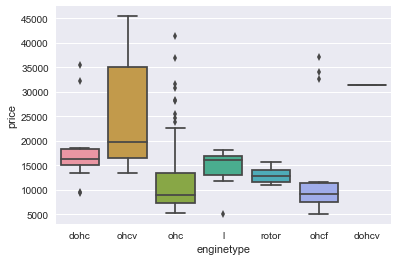

In [18]:
# plot enginetype against price
sns.boxplot(x='enginetype',y='price',data=car)

In [19]:
#create dummy variables for enginetype
print ("car shape before: ",car.shape)

#let us convert this column  using 'one hot encoding'
car_enginetype = pd.get_dummies(car.enginetype,prefix='enginetype')

print ("Encoded data shape:",car_enginetype.shape)

car = pd.concat([car,car_enginetype],axis=1)

#drop drivewheel column
car.drop('enginetype',axis=1,inplace=True)

print ("car shape: after",car.shape)

car.head()

car shape before:  (205, 31)
Encoded data shape: (205, 7)
car shape: after (205, 37)


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,...,fwd,rwd,enginelocationFront,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,2,88.6,168.8,64.1,48.8,2548,four,130,mpfi,...,0,1,1,1,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,four,130,mpfi,...,0,1,1,1,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,six,152,mpfi,...,0,1,1,0,0,0,0,0,1,0
3,2,4,99.8,176.6,66.2,54.3,2337,four,109,mpfi,...,1,0,1,0,0,0,1,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,five,136,mpfi,...,0,0,1,0,0,0,1,0,0,0


In [20]:
#check cylindernumber 
print (car.cylindernumber.value_counts())

#Map the cylindernumber to numeric
car['cylindernumber'] = car.cylindernumber.map({"two":2, "three":3, "four":4,
                                                "five":5, "six":6, "eight":8, "twelve":12})

car.cylindernumber.unique()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


array([ 4,  6,  5,  3, 12,  2,  8])

In [21]:
#check fuel system
car.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [22]:
#check fuel system vs fueltype
pd.crosstab(car.fueltype_gas,car.fuelsystem)

fuelsystem,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
fueltype_gas,,,,,,,,
0,0,0,0,20,0,0,0,0
1,11,66,3,0,1,94,9,1


The diesel fuel type cars have indirect fuel injection systems (idi) whereas rest of the fuel system corresponds to gas fuel type

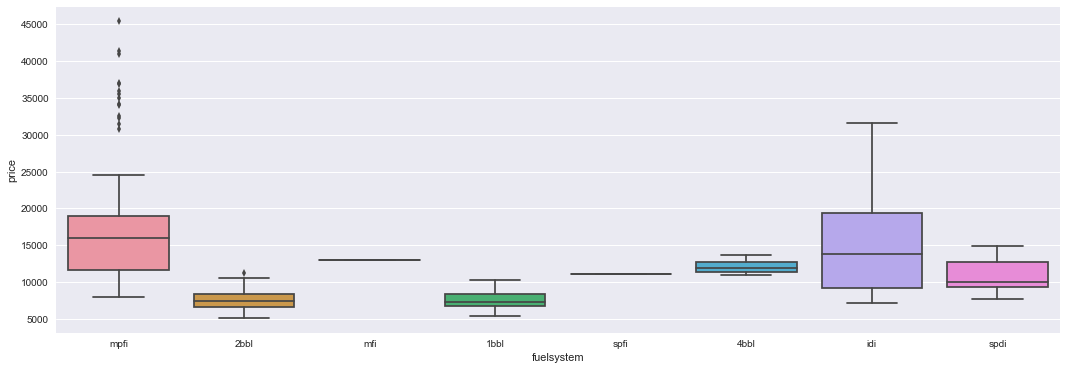

In [23]:
# price with fuelsystem
plt.figure(figsize=(18,6))
sns.boxplot(y='price',x='fuelsystem',data=car)

In [24]:
#dropping the column fuelsystem as it directly correlates to fueltype
car.drop('fuelsystem',axis=1,inplace=True)

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
symboling              205 non-null int64
doornumber             205 non-null int64
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
cylindernumber         205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
make                   205 non-null object
fueltype_gas           205 non-null int64
aspiration_std         205 non-null int64
convertible            205 non-null ui

In [26]:
# filtering categorical variables that are not yet imputed. make is the only variable that needs to be addressed
car.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
make    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


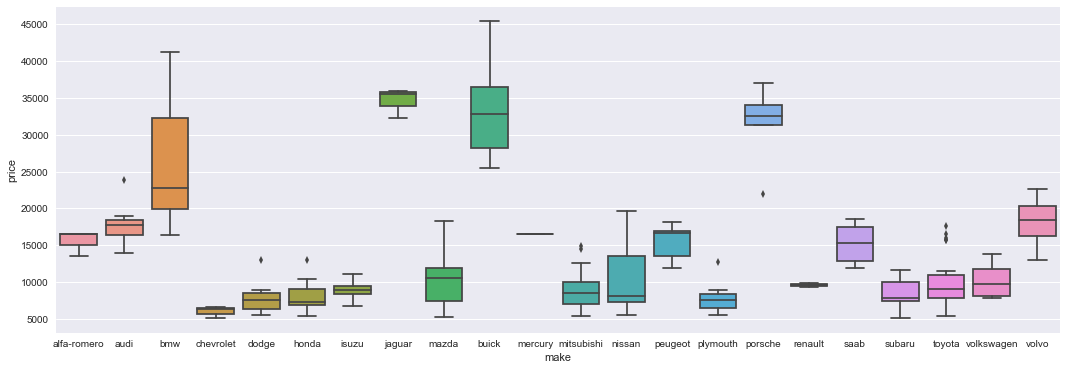

In [27]:
# check price with make
plt.figure(figsize=(18,6))
sns.boxplot(y='price',x='make',data=car)

In [28]:
# pick the top makes based on average price and mark rest of the makes as others
print (car.groupby('make',as_index=False).agg(np.median)[['make','price']].sort_values(by='price',ascending=False)[:10])

#create new column to indicate top3make, top10make
car['top3make'] = car.make.apply(lambda x: 1 if x in ['jaguar','buick','porsche'] else 0)
car['top10make'] = car.make.apply(lambda x: 1 if x in ['jaguar','buick','porsche','bmw','volvo',
                                                       'audi','peugeot','mercury','alfa-romero','saab'] else 0)

#drop make column
car.drop('make',axis=1,inplace=True)

car.head()

           make    price
8        jaguar  35550.0
3         buick  32892.0
15      porsche  32528.0
2           bmw  22835.0
21        volvo  18420.0
1          audi  17710.0
13      peugeot  16630.0
10      mercury  16503.0
0   alfa-romero  16500.0
17         saab  15275.0


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginelocationFront,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,top3make,top10make
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,1,1,0,0,0,0,0,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,1,1,0,0,0,0,0,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,1,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,1,0,0,0,1,0,0,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,1,0,0,0,1,0,0,0,0,1


In [29]:
#check if all categorical are converted to numeric
car.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Empty DataFrame

In [30]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
symboling              205 non-null int64
doornumber             205 non-null int64
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
cylindernumber         205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
fueltype_gas           205 non-null int64
aspiration_std         205 non-null int64
convertible            205 non-null uint8
hardtop                205 non-null uin

### 2.  Data Analysis for Numeric variables

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0.98,'Distribution of Price')

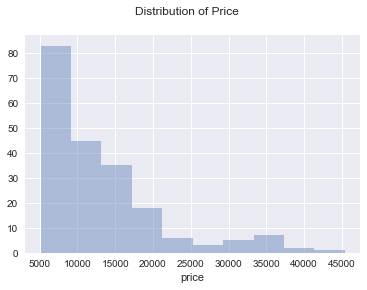

In [31]:
# check price distribution
sns.distplot(car.price,  bins=10, kde=False)
plt.suptitle("Distribution of Price")

In [32]:
car.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

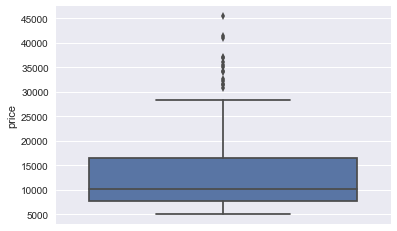

In [33]:
sns.boxplot(y='price',data=car)

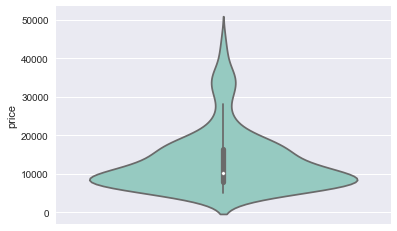

In [34]:
sns.violinplot(y='price',data=car,palette="Set3")

Observations: 
    1. Price has a mean of 13276 and median of 10295
    2. Most of cars price are around the mean.
    3. There are few cars where price range falls beyond 30000

In [35]:
#check column wheelbase
car.wheelbase.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

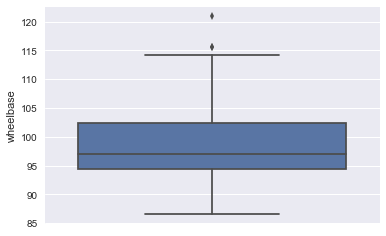

In [36]:
# plot wheelbase
sns.boxplot(y='wheelbase',data=car)

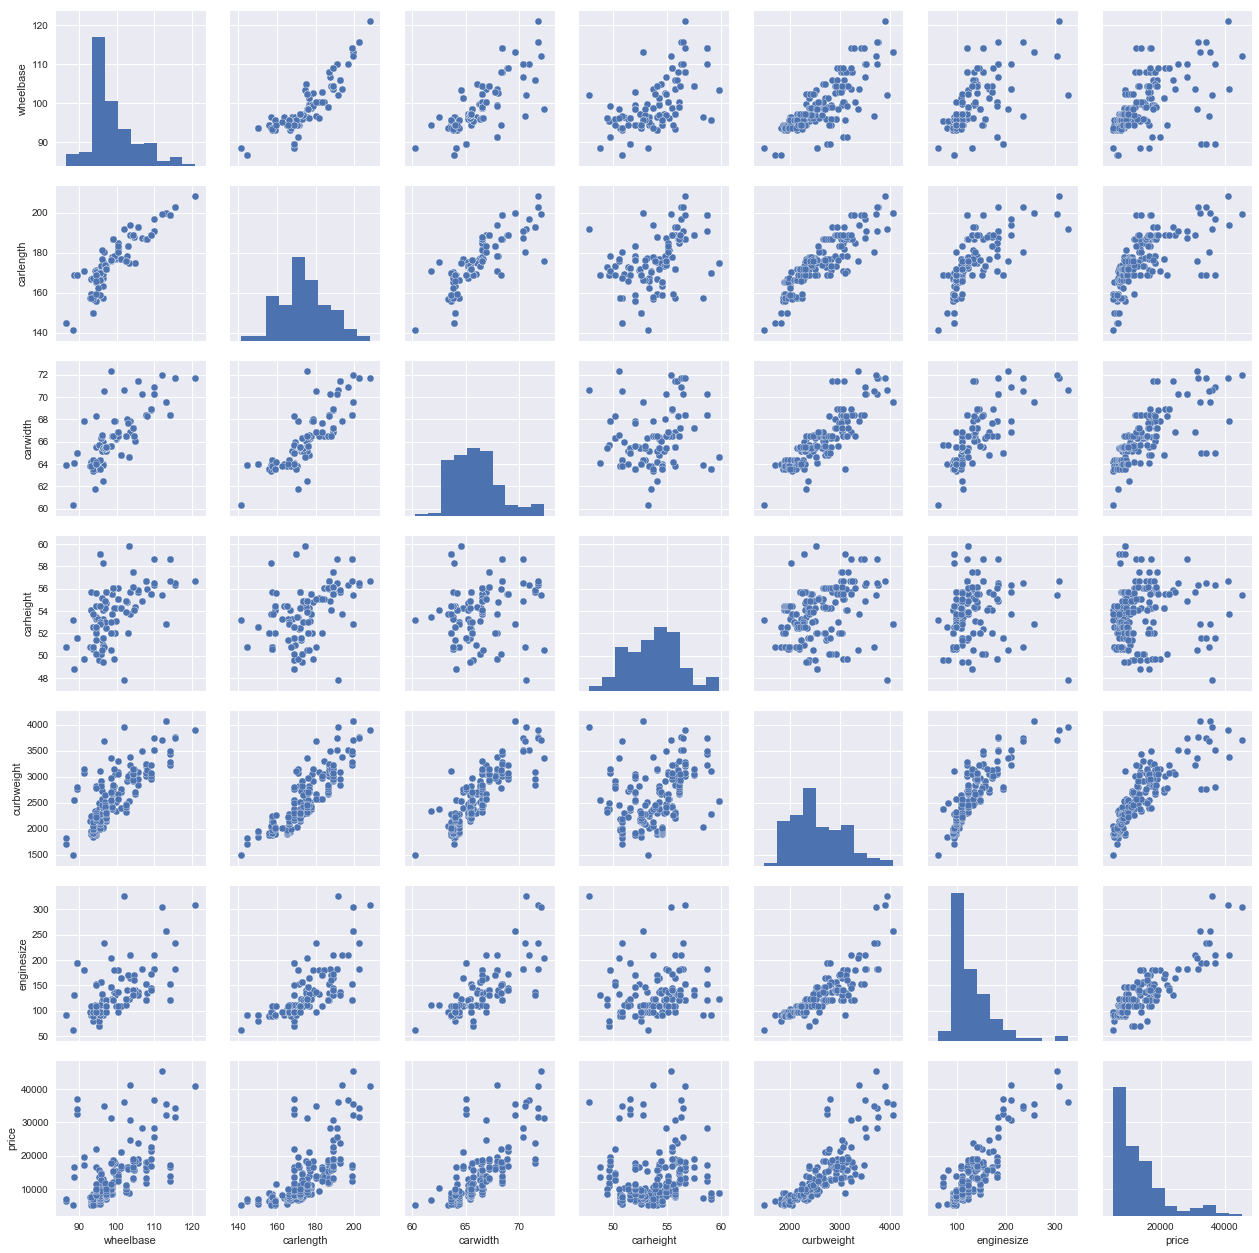

In [37]:
#plot physical features of the car against price
sns.pairplot(car[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
                  'price']])

Observations:
    1. wheelbase: has a linear relation with the price.
    2. carlength: has a linear relation with the price. Longer the car, the price also shows gradual increase
    3. carwidth: has a linear relation with the price. Wider the car, the price also show gradual increase
    4. carheight: does not show a linear relation with the price. the values are distributed across the price
    5. curbweight: has a linear relation with the price.
    6. enginesize: also has a linear relation with the price

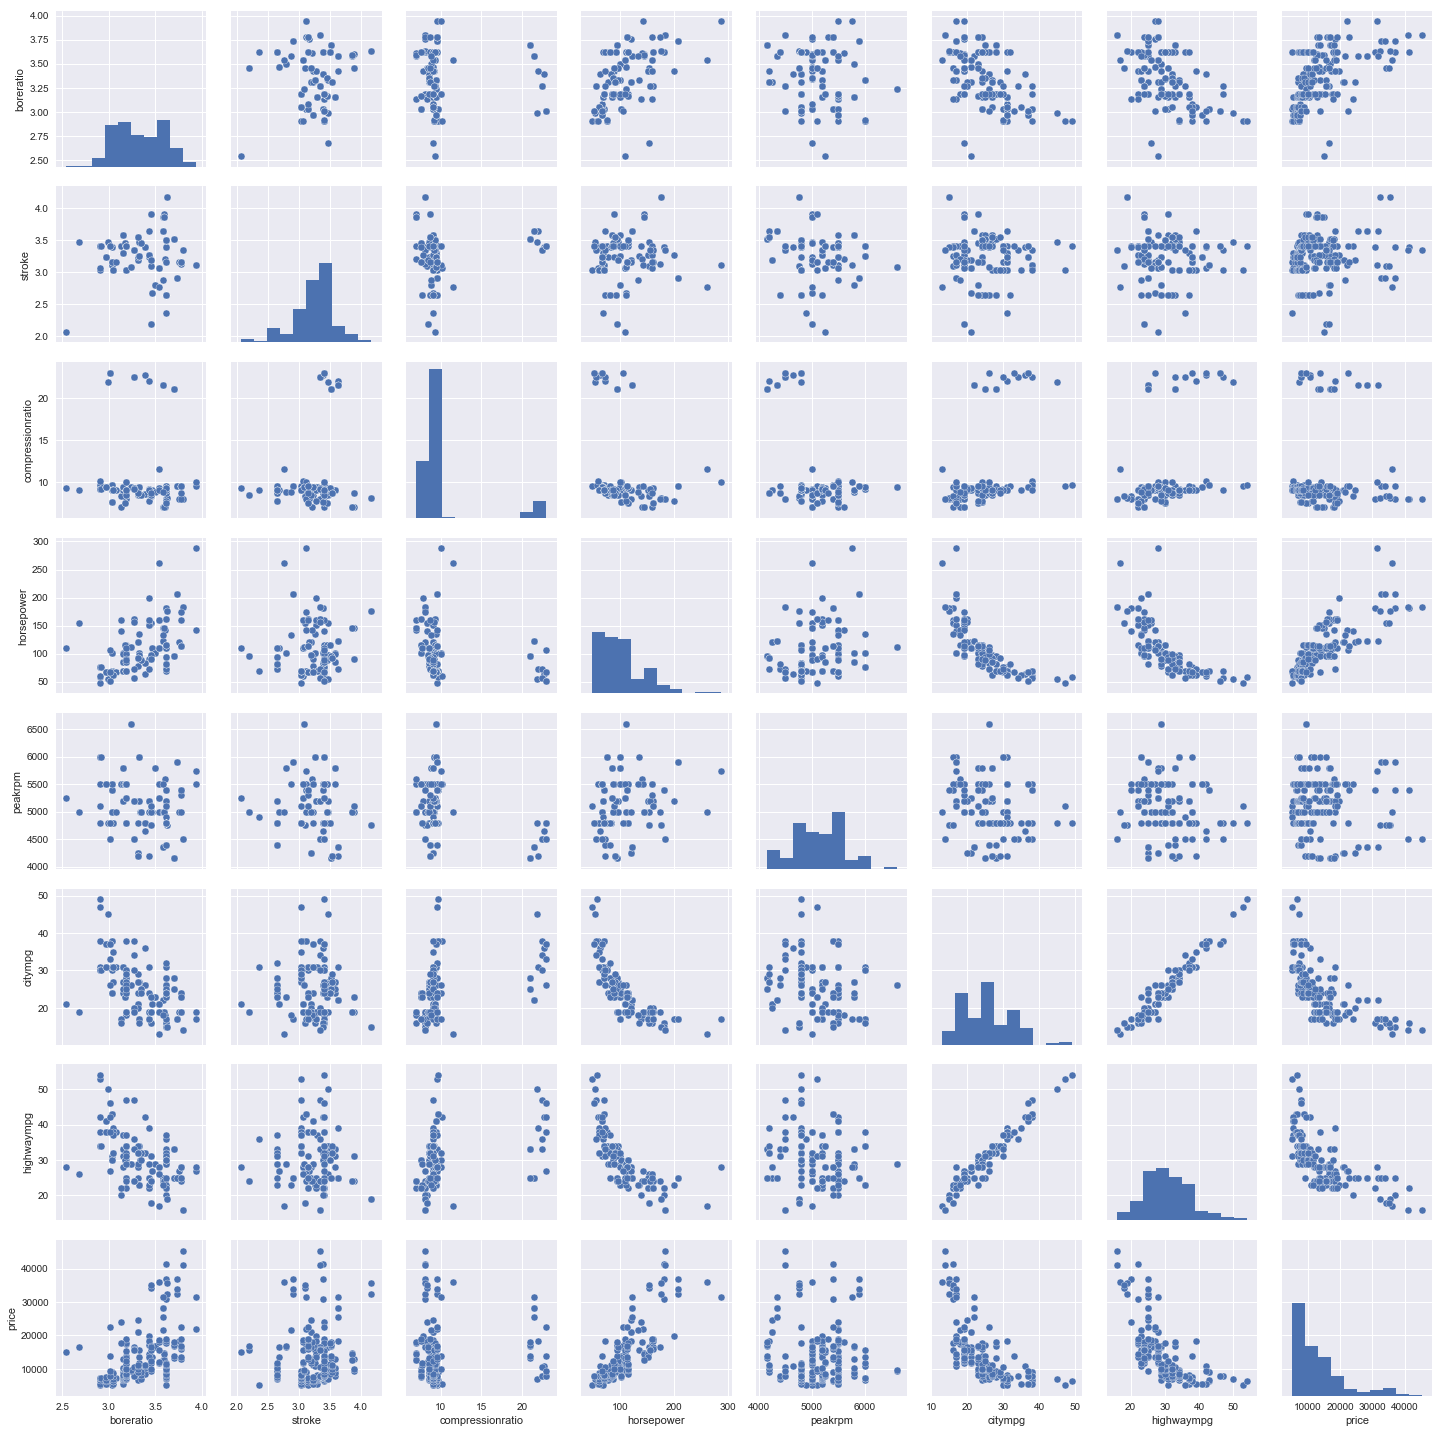

In [38]:
#plot performance features of the car against price
sns.pairplot(car[['boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']])

Observations:
    1. boreratio, stroke, compressionratio, peakrpm - does not show strong linear relation with price
    2. However, horsepower has a strong linear relation with price. Higher the horsepower, price also has an increase
    3. citympg, highwaympg has a negative corelation with price. Lower the mileage, higher the price. It is also observed that citympg and highwaympg has a strong corelation with each other.

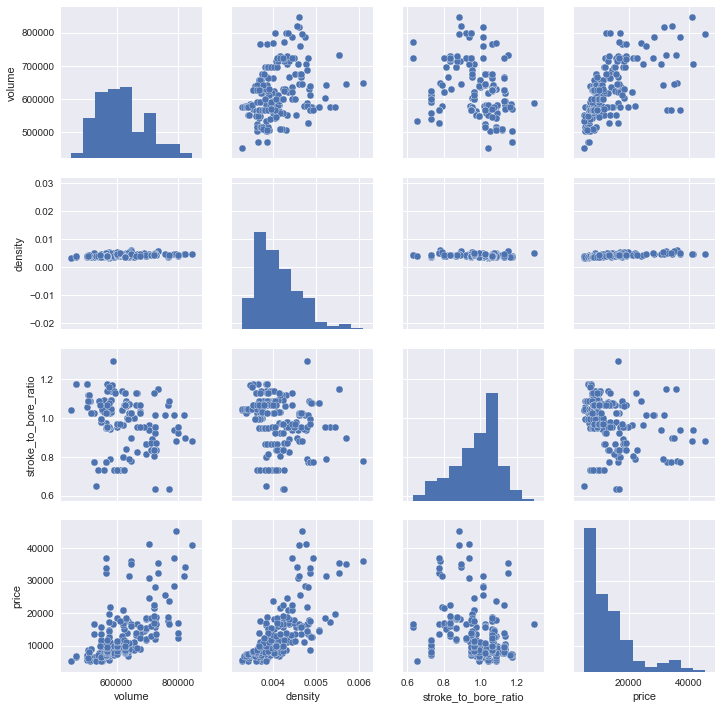

In [39]:
#let us derive few variables and check the relation against price

#new column volume = carwidth * carlength * carheight
car['volume'] = car.carwidth * car.carlength * car.carheight

#new column density = curbweight / volume
car['density'] = car.curbweight / car.volume

#new column stroke to bore ratio = stroke/boreratio
car['stroke_to_bore_ratio'] = car.stroke / car.boreratio

#plot these new derived variables against price
sns.pairplot(car[['volume','density','stroke_to_bore_ratio','price']])

Observations: 
    1. volume and density shows a strong linear relation with price. it could be because of the variables carlength, carwidth, curbweight also showed linear relation with the price.
    2. stroke_to_bore_ration does not show a strong relation with price

In [40]:
# now we have 40 variables.
print (car.shape)

(205, 40)


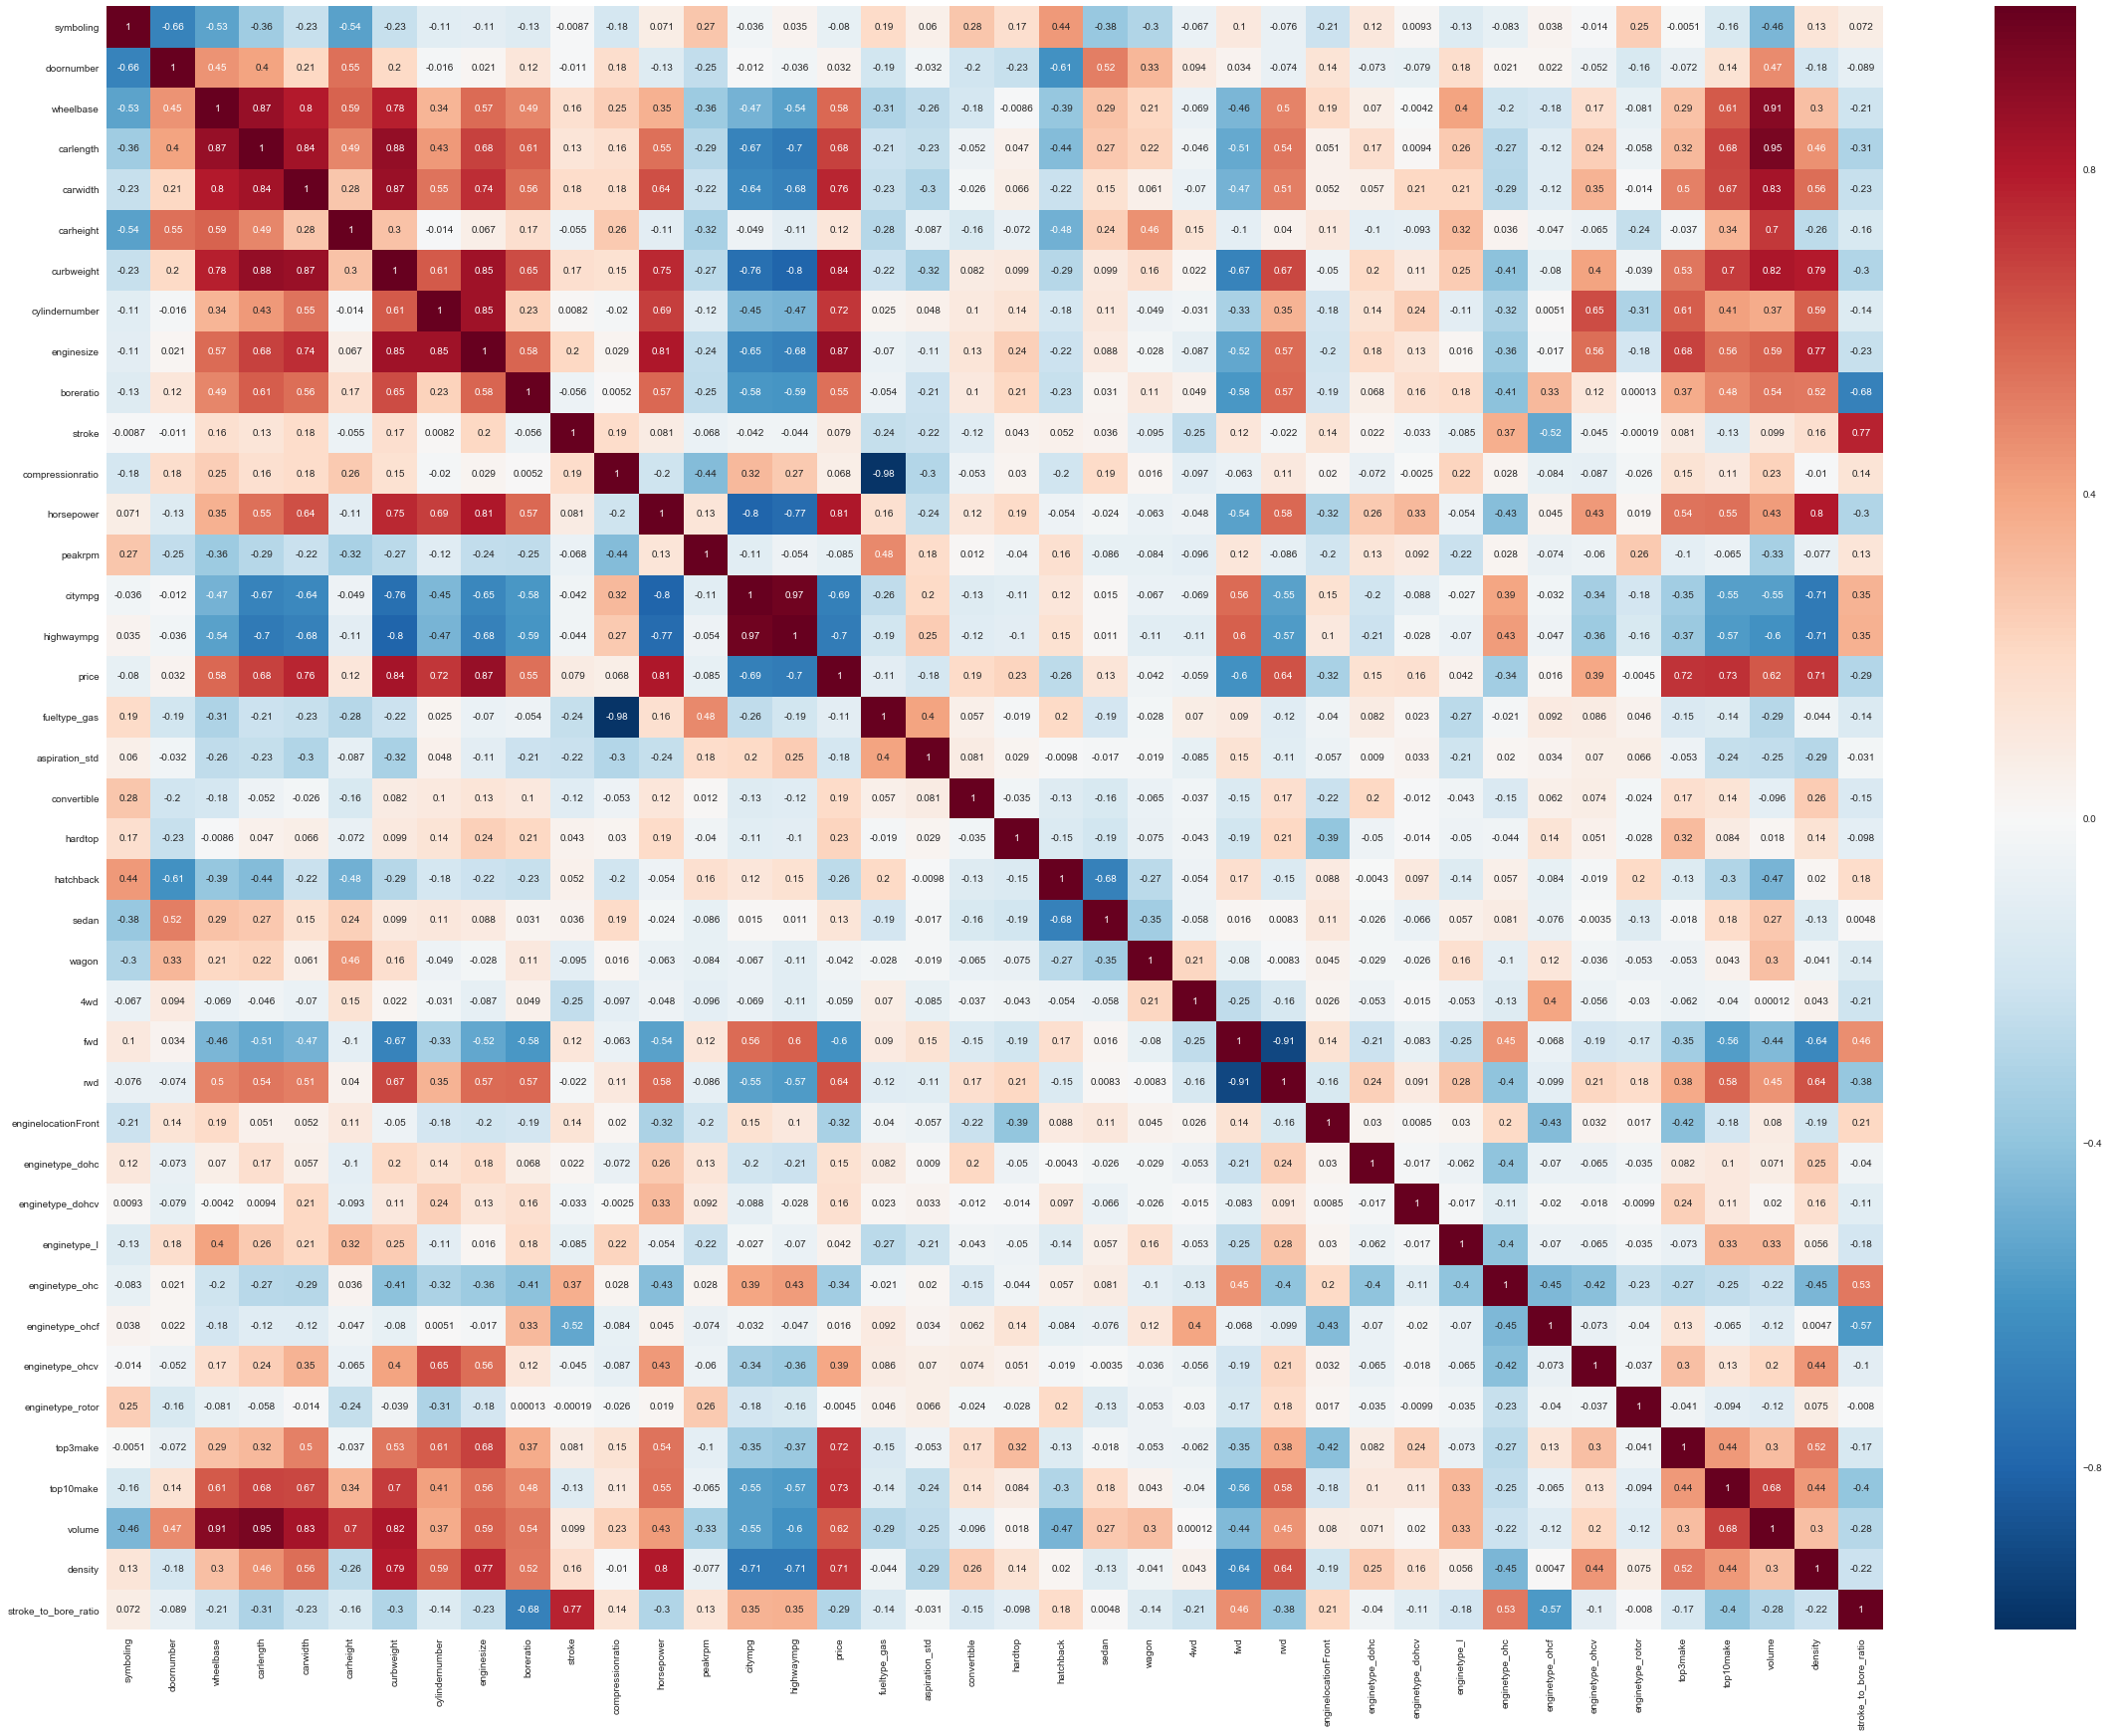

In [41]:
# check the correlation coefficient to filter the rows that are not strongly correlated
plt.figure(figsize=(40,30))
sns.heatmap(car.corr(),annot = True)

In [42]:
# define a function for linear model

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def linear_regression(X,y):
    lm = LinearRegression()
    lm.fit(X,y)
    X = sm.add_constant(X)

    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return lm

In [43]:
# define a function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
#     x_vars=input_data.drop([dependent_col], axis=1)
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [44]:
car.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'aspiration_std', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd',
       'enginelocationFront', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'top3make', 'top10make', 'volume', 'density',
       'stroke_to_bore_ratio'],
      dtype='object')

#### Model 1 with all variables

In [45]:
#model 1 with all variables

X = car[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_gas', 'aspiration_std', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd',
       'enginelocationFront', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'top3make', 'top10make', 'volume', 'density',
       'stroke_to_bore_ratio']]

y = car.price

lm_1 = linear_regression(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     73.61
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.84e-85
Time:                        14:40:50   Log-Likelihood:                -1843.4
No. Observations:                 205   AIC:                             3761.
Df Residuals:                     168   BIC:                             3884.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  8.97e+04 

In [46]:
vif_cal(X,y)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars


,Var,Vif
19,hardtop,inf
28,enginetype_dohcv,inf
21,sedan,inf
22,wagon,inf
23,4wd,inf
24,fwd,inf
25,rwd,inf
27,enginetype_dohc,inf
29,enginetype_l,inf
18,convertible,inf


Observations: 
    1. 'boreratio', 'carwidth', 'stroke_to_bore_ratio', 'volume',  'stroke', 'carheight', 'enginetype_l', 'carlength',   'enginetype_ohcv',  enginetype_dohcv' - These variables have high p-value and high VIF
    2. 'wheelbase', 'horsepower', 'citympg', 'cylindernumber', 'highwaympg', 'aspiration_std','doornumber', 'top3make', 'symboling' - these variables have high p-value but VIF < 10. Let us continue to use this for further modelling
    3. 'enginetype_dohc', 'wagon' , 'hatchback', 'hardtop', 'fwd', 'sedan', '4wd', 'peakrpm', 'enginetype_ohcf', 'rwd', 'enginetype_ohc', 'convertible', 'enginelocationFront', 'compressionratio', 'enginetype_rotor', 'density', 'curbweight', 'enginesize', 'fueltype_gas', 'top10make' - These variables have p-value less than or close to 0.1 and will be considered for modelling further

In [47]:
car_df = car[['wheelbase', 'horsepower', 'citympg', 'cylindernumber', 'highwaympg', 
              'aspiration_std','doornumber', 'top3make', 'symboling', 'enginetype_dohc', 
              'wagon' , 'hatchback', 'hardtop', 'fwd', 'sedan', '4wd', 'peakrpm', 
              'enginetype_ohcf', 'rwd', 'enginetype_ohc', 'convertible', 'enginelocationFront', 
              'compressionratio', 'enginetype_rotor', 'density', 'curbweight', 'enginesize', 
              'fueltype_gas', 'top10make', 
              'price']]

In [48]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
wheelbase              205 non-null float64
horsepower             205 non-null int64
citympg                205 non-null int64
cylindernumber         205 non-null int64
highwaympg             205 non-null int64
aspiration_std         205 non-null int64
doornumber             205 non-null int64
top3make               205 non-null int64
symboling              205 non-null int64
enginetype_dohc        205 non-null uint8
wagon                  205 non-null uint8
hatchback              205 non-null uint8
hardtop                205 non-null uint8
fwd                    205 non-null uint8
sedan                  205 non-null uint8
4wd                    205 non-null uint8
peakrpm                205 non-null int64
enginetype_ohcf        205 non-null uint8
rwd                    205 non-null uint8
enginetype_ohc         205 non-null uint8
convertible            205 non-null uint8
enginelocat

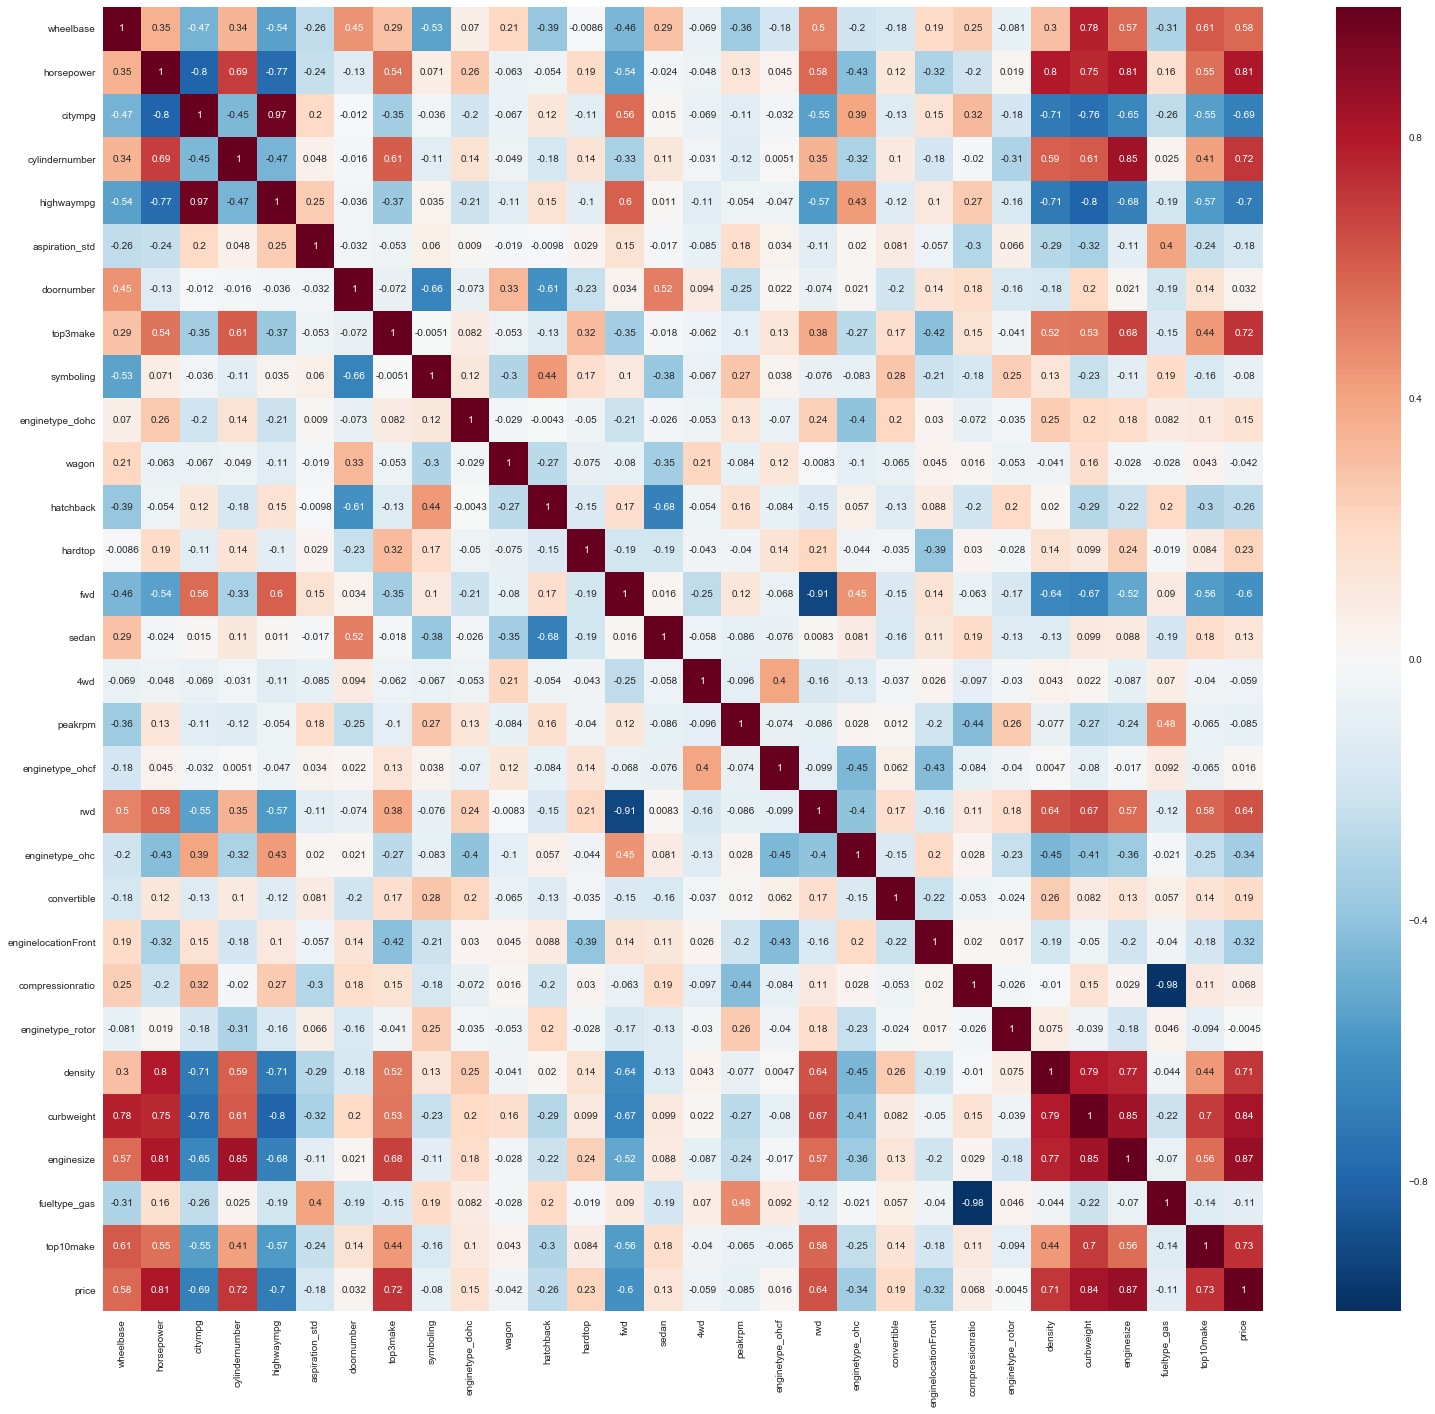

In [49]:
# check the correlation coefficients for these 30 variables
plt.figure(figsize=(26,24))
sns.heatmap(car_df.corr(),annot=True)

<b>Observation:</b>
    1. enginesize shows high positive correlation (0.87) with the price
    
<b> Let us pick the variables that have high correlation with the price one by one to build the model </b>

#### Model: 2 - With engine size

In [50]:
# linear regression model with enginesize
X = car_df[['enginesize']]

y = car['price']

lm_2 = linear_regression(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.35e-65
Time:                        14:40:55   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

<b>Observation: </b>
    1. enginesize variable has a p value close to 0. This model gives a R-squared of 0.76 and Adj R-squared of 0.76.

#### Model: 3 - Add column curbweight

In [51]:
# linear regression model with enginesize, curbweight
X = car_df[['enginesize','curbweight']]

y = car['price']

lm_3 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.77e-70
Time:                        14:40:55   Log-Likelihood:                -1970.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.415e+04   1387.924    -10.192      0.0

,Var,Vif
0,enginesize,31.58
1,curbweight,31.58


<b>Observation:</b>
    1. curbweight variable has a p value close to 0. The R-squared value has increased from 0.76 to 0.79. Adj R-squared value is also close to R-squared value
    2. There is no change in p-value for enginesize with addition of new variable

#### Model: 4 - Add column horsepower

In [52]:
# linear regression model with enginesize, curbweight, horsepower
X = car_df[['enginesize','curbweight','horsepower']]

y = car['price']

lm_4 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     292.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.36e-73
Time:                        14:40:55   Log-Likelihood:                -1960.2
No. Observations:                 205   AIC:                             3928.
Df Residuals:                     201   BIC:                             3942.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.346e+04   1333.051    -10.100      0.0

,Var,Vif
0,enginesize,45.36
1,curbweight,32.75
2,horsepower,23.81


<b>Observation:</b>
    1. horsepower variable has a p value close to 0. The R-squared value has increased from 0.79 to 0.81. Adj R-squared value is also close to R-squared value
    2. There is no change in p-value for other variables with addition of new variable

#### Model: 5 - Add column cylindernumber

In [53]:
# linear regression model with enginesize, curbweight, horsepower, cylindernumber
X = car_df[['enginesize','curbweight','horsepower','cylindernumber']]

y = car['price']

lm_5 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.12e-72
Time:                        14:40:55   Log-Likelihood:                -1960.0
No. Observations:                 205   AIC:                             3930.
Df Residuals:                     200   BIC:                             3947.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const          -1.409e+04   1804.760     -7.

,Var,Vif
0,enginesize,62.53
3,cylindernumber,40.36
1,curbweight,37.22
2,horsepower,23.81


<b>Observation:</b>
    1. cylindernumber variable has a high p value 0.6. The Adj R-squared value has not increased from 0.81.
    2. There is no change in p-value for other variables with addition of new variable
    3. Let us drop the cylindernumber variable due to high p-value

#### Model: 6 - remove cylindernumber and Add column top10make

In [54]:
# linear regression model with enginesize, curbweight, horsepower, top10make
X = car_df[['enginesize','curbweight','horsepower','top10make']]

y = car['price']

lm_6 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     318.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.80e-85
Time:                        14:40:55   Log-Likelihood:                -1927.9
No. Observations:                 205   AIC:                             3866.
Df Residuals:                     200   BIC:                             3882.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -6199.6452   1419.822     -4.366      0.0

,Var,Vif
0,enginesize,45.47
1,curbweight,32.80
2,horsepower,24.46
3,top10make,1.87


<b>Observation:</b>
    1. top10make variable has a high p value close to 0. The Adj R-squared value has increased from 0.81 to 0.86.
    2. The p-value for curbweight changed from 0 to 0.61. top10make and curbweight variables are correlated with a correlation coefficient 0.7
    3. The VIF for top10make is lesser than curbweight, hence we can decide to drop curbweight variable from our model

#### Model: 7 - remove curbweight variable

In [55]:
# linear regression model with enginesize, horsepower, top10make
X = car_df[['enginesize','horsepower','top10make']]

y = car['price']

lm_7 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     425.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.09e-87
Time:                        14:40:55   Log-Likelihood:                -1928.0
No. Observations:                 205   AIC:                             3864.
Df Residuals:                     201   BIC:                             3877.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -5583.4662    723.242     -7.720      0.0

,Var,Vif
1,horsepower,23.56
0,enginesize,22.99
2,top10make,1.86


<b>Observation:</b>
    1. The Adj R-squared value has not increased from 0.86.
    2. The VIF values of other variables have also decreased.

#### Model: 8 - add top3make variable

In [56]:
# linear regression model with enginesize, horsepower, top10make, top3make
X = car_df[['enginesize','horsepower','top10make','top3make']]

y = car['price']

lm_8 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     394.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.10e-93
Time:                        14:40:55   Log-Likelihood:                -1908.5
No. Observations:                 205   AIC:                             3827.
Df Residuals:                     200   BIC:                             3844.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2738.1007    791.950     -3.457      0.0

,Var,Vif
1,horsepower,23.97
0,enginesize,23.79
2,top10make,2.06
3,top3make,1.42


<b>Observation:</b>
    1. top3make has a p-value close to 0. The Adj R-squared has increased from 0.86 to 0.88
    2. The VIF value of top3make is also low 1.42.
    3. There is no change in the p-value and VIF for other variables after the new variable top3make is added

#### Model: 9 - add density variable

In [57]:
# linear regression model with enginesize, horsepower, top10make, top3make, density
X = car_df[['enginesize','horsepower','top10make','top3make', 'density']]

y = car['price']

lm_9 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     314.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.33e-92
Time:                        14:40:55   Log-Likelihood:                -1908.5
No. Observations:                 205   AIC:                             3829.
Df Residuals:                     199   BIC:                             3849.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2743.7781   2090.350     -1.313      0.1

,Var,Vif
0,enginesize,44.57
4,density,31.30
1,horsepower,26.30
2,top10make,2.22
3,top3make,1.94


<b>Observation:</b>
    1. density has a p-value close to 0.9. The Adj R-squared has not changed from 0.88
    2. The density and enginesize variables are correlated with a coefficient of 0.77.
    3. The VIF values have changed significantly for enginesize after adding density
    4. There is no change in the p-value and VIF for other variables after the new variable density is added
    5. let us drop enginesize variable to see if it affects the model

#### Model: 10 - keep density variable remove enginesize

In [58]:
# linear regression model with enginesize, horsepower, top10make, top3make
X = car_df[['horsepower','top10make','top3make', 'density']]

y = car['price']

lm_10 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     289.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.44e-82
Time:                        14:40:55   Log-Likelihood:                -1936.3
No. Observations:                 205   AIC:                             3883.
Df Residuals:                     200   BIC:                             3899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -3359.7909   2386.436     -1.408      0.1

,Var,Vif
0,horsepower,20.59
3,density,16.70
1,top10make,2.16
2,top3make,1.52


<b>Observation:</b>
    1. Removing enginesize has brought down the Adj R-squared of the model from 0.88 to 0.85. The model with enginesize and not density had a Adj r-squared of 0.88
    2. the VIF for density is 16.7 , is less compared to that of enginesize 23.8
    3. As per the domain density and enginesize are indirectly correlated. Since density depends on the curbweight and volume and volume depends on the car length, width and height. Enginesize is also correlated to the dimensions of the vehicle. Lets keep enginesize variable and remove density

#### Model: 11 - keep enginesize variable remove density

In [59]:
# linear regression model with enginesize, horsepower, top10make, top3make
X = car_df[['enginesize', 'horsepower','top10make','top3make']]

y = car['price']

lm_11 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     394.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.10e-93
Time:                        14:40:55   Log-Likelihood:                -1908.5
No. Observations:                 205   AIC:                             3827.
Df Residuals:                     200   BIC:                             3844.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2738.1007    791.950     -3.457      0.0

,Var,Vif
1,horsepower,23.97
0,enginesize,23.79
2,top10make,2.06
3,top3make,1.42


<b>Observation:</b>
    1. Adj R-squared value has increased to 0.88

#### Model: 12 - add highwaympg variable

In [60]:
# linear regression model with enginesize, horsepower, top10make, top3make, highwaympg
X = car_df[['enginesize', 'horsepower','top10make','top3make','highwaympg']]

y = car['price']

lm_12 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     318.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.02e-93
Time:                        14:40:55   Log-Likelihood:                -1907.4
No. Observations:                 205   AIC:                             3827.
Df Residuals:                     199   BIC:                             3847.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        389.5439   2275.005      0.171      0.8

,Var,Vif
0,enginesize,35.70
1,horsepower,24.20
4,highwaympg,7.11
2,top10make,2.31
3,top3make,1.83


<b>Observation:</b>
    1. Adj R-squared value has not increased from 0.88. The VIF value for highwaympg variable is low, but has increased the VIF values for horsepower and enginesize.
    2. The p-value for highwaympg is high 0.14. Also the highwaympg is negatively correlated with enginesize and horsepower (correlation coefficient around -0.7).
    3. Let us try dropping enginesize to check how the variables change

#### Model: 13 - keep highwaympg variable and drop enginesize

In [61]:
# linear regression model with  horsepower, top10make, top3make, highwaympg
X = car_df[['horsepower','top10make','top3make','highwaympg']]

y = car['price']

lm_13 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     292.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.18e-82
Time:                        14:40:55   Log-Likelihood:                -1935.2
No. Observations:                 205   AIC:                             3880.
Df Residuals:                     200   BIC:                             3897.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7422.5286   2390.315      3.105      0.0

,Var,Vif
0,horsepower,7.31
3,highwaympg,4.74
1,top10make,2.24
2,top3make,1.53


<b>Observation:</b>
    1. Adj R-squared value has  decreased from 0.88 to 0.85. The VIF value for highwaympg variable is low and has decrased the VIF value of horsepower variable also
    2. The p-value for highwaympg is decreased from 0.14 to 0.01. 

#### Model: 14 - add citympg variable

In [62]:
# linear regression model with  horsepower, top10make, top3make, highwaympg, citympg
X = car_df[['horsepower','top10make','top3make','highwaympg','citympg']]

y = car['price']

lm_14 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     236.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.10e-81
Time:                        14:40:55   Log-Likelihood:                -1933.8
No. Observations:                 205   AIC:                             3880.
Df Residuals:                     199   BIC:                             3900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6756.9997   2416.255      2.796      0.0

,Var,Vif
3,highwaympg,374.26
4,citympg,327.82
0,horsepower,9.38
1,top10make,2.25
2,top3make,1.58


<b>Observation:</b>
    1. Adj R-squared value has not changed from 0.85. The VIF value for highwaympg variable and citympg variable has significant increase. 
    2. The p-value for highwaympg is 0.14 and citympg is 0.11. Since both the variables are highly correlated.
    3. The citympg coefficient is positive though it has a negative correlation with price
    4. let us drop highwaympg variable to validate

#### Model: 15 - keep citympg variable and drop highwaympg

In [63]:
# linear regression model with  horsepower, top10make, top3make, highwaympg, citympg
X = car_df[['horsepower','top10make','top3make','citympg']]

y = car['price']

lm_15 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     286.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.27e-81
Time:                        14:40:55   Log-Likelihood:                -1937.0
No. Observations:                 205   AIC:                             3884.
Df Residuals:                     200   BIC:                             3901.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5538.3266   2396.475      2.311      0.0

,Var,Vif
0,horsepower,6.52
3,citympg,4.15
1,top10make,2.23
2,top3make,1.51


<b>Observation:</b>
    1. Adj R-squared value has not changed from 0.85. The VIF value for citympg variable is 4.15. 
    2. The p-value for citympg is 0.07.
    3. The citympg coefficient is negative as it has a negative correlation with price

In [64]:
## let us plot the error terms for the model with citympg and highwaympg

In [65]:
# define a function to calculate mean squared error, residual error and plot the actual and predicted results

from sklearn.metrics import mean_squared_error, r2_score

def prediction_results(lm, X, y):
    X = sm.add_constant(X)
    
    y_pred = lm.predict(X)
    
    print('\n')
    print('Mean_Squared_Error  :' ,mean_squared_error(y, y_pred))
    print('RMSE                : ', np.sqrt(mean_squared_error(y, y_pred)/len(y)))
    print('r_square_value      :',r2_score(y, y_pred))
    print('\n')
    
    print(y.shape, y_pred.shape, len(y))
#     plt.subplot(1,2,1)
    c = [i for i in range(1,len(y)+1,1)]
    fig = plt.figure()
    plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Price', fontsize=16)                               # Y-label


#     plt.subplot(1,2,2)
    # Error terms
    c = [i for i in range(1,len(y)+1,1)]
    fig = plt.figure()
    plt.plot(c,y-y_pred, color="blue", linewidth=2.5, linestyle="-")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('ActualPrice-PredictedPrice', fontsize=16)                # Y-label
    
def actualVsPredicted(lm, X, y):
    X = sm.add_constant(X)
    
    y_pred = lm.predict(X)
    plt.scatter(y,y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     292.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.18e-82
Time:                        14:40:56   Log-Likelihood:                -1935.2
No. Observations:                 205   AIC:                             3880.
Df Residuals:                     200   BIC:                             3897.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7422.5286   2390.315      3.105      0.0

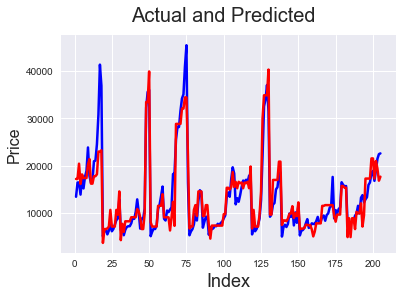

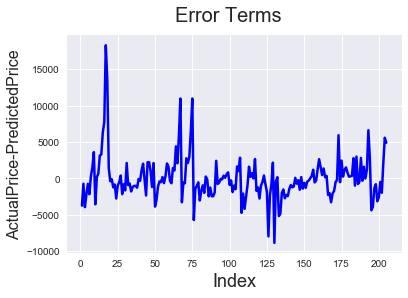

In [66]:
# linear regression model with  horsepower, top10make, top3make, highwaympg
X = car_df[['horsepower','top10make','top3make','highwaympg']]

y = car['price']

lm_13 = linear_regression(X,y)

vif_cal(X,y)

prediction_results(lm_13, X, y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     286.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.27e-81
Time:                        14:40:56   Log-Likelihood:                -1937.0
No. Observations:                 205   AIC:                             3884.
Df Residuals:                     200   BIC:                             3901.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5538.3266   2396.475      2.311      0.0

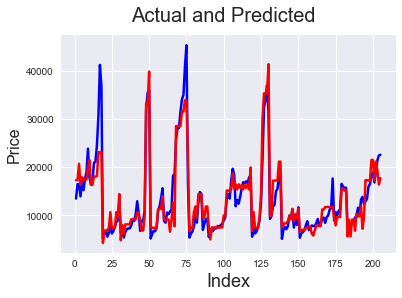

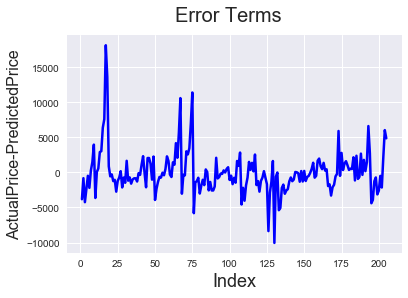

In [67]:
# linear regression model with  horsepower, top10make, top3make, citympg
X = car_df[['horsepower','top10make','top3make','citympg']]

y = car['price']

lm_15 = linear_regression(X,y)

vif_cal(X,y)

prediction_results(lm_15, X, y)

<b> Observation: </b>
    1. The predicted results of price for model with highwaympg merges well with the actual price. 
    2. RMSE is less in model with highwaympg when compared to model with citympg

#### Model: 16 - keep highwaympg variable 

In [68]:
# linear regression model with  horsepower, top10make, top3make, highwaympg
X = car_df[['horsepower','top10make','top3make','highwaympg']]

y = car['price']

lm_16 = linear_regression(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     292.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.18e-82
Time:                        14:40:56   Log-Likelihood:                -1935.2
No. Observations:                 205   AIC:                             3880.
Df Residuals:                     200   BIC:                             3897.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7422.5286   2390.315      3.105      0.0

In [69]:
vif_cal(X,y)

,Var,Vif
0,horsepower,7.31
3,highwaympg,4.74
1,top10make,2.24
2,top3make,1.53




Mean_Squared_Error  : 9265599.130350107
RMSE                :  212.5983173458652
r_square_value      : 0.8541090295276056


(205,) (205,) 205


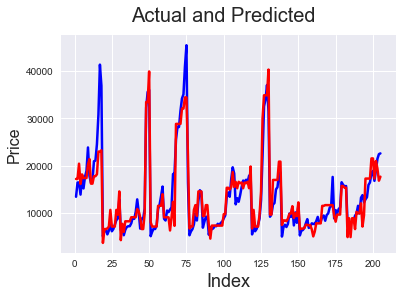

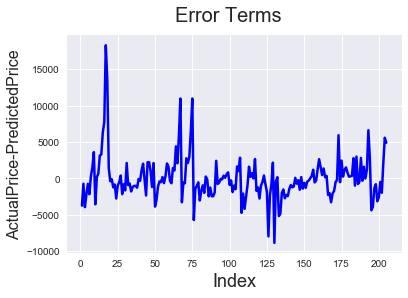

In [70]:
prediction_results(lm_16,X,y)

#### Model: 17 - add rwd, fwd variable 

In [71]:
# linear regression model with  horsepower, top10make, top3make, highwaympg, rwd,fwd
X = car_df[['horsepower','top10make','top3make','highwaympg','rwd','fwd']]

y = car['price']

lm_17 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     200.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.44e-81
Time:                        14:40:57   Log-Likelihood:                -1931.8
No. Observations:                 205   AIC:                             3878.
Df Residuals:                     198   BIC:                             3901.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6745.7233   2409.175      2.800      0.0

,Var,Vif
3,highwaympg,16.50
5,fwd,15.17
0,horsepower,10.70
4,rwd,10.10
1,top10make,2.57
2,top3make,1.53


<b> Observation:</b>
    1. both the variable fwd and rwd are also highly correlated to each other. The p-value for VIF value for rwd is less compared to fwd
    2. lets remove fwd to validate

#### Model: 18 - remove fwd variable

In [72]:
# linear regression model with  horsepower, top10make, top3make, highwaympg, rwd
X = car_df[['horsepower','top10make','top3make','highwaympg','rwd']]

y = car['price']

lm_18 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     242.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.52e-82
Time:                        14:40:57   Log-Likelihood:                -1931.8
No. Observations:                 205   AIC:                             3876.
Df Residuals:                     199   BIC:                             3896.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6834.6071   2368.229      2.886      0.0

,Var,Vif
0,horsepower,8.83
3,highwaympg,4.96
4,rwd,2.85
1,top10make,2.57
2,top3make,1.53


<b> Observation:</b>
    1. the p-value of rwd is 0.01 and the p-value of highwaympg has increased to 0.029. 
    2. The Adj r-squared value is still 0.85

#### Model: 19 - add wheelbase variable

In [73]:
# linear regression model with  horsepower, top10make, top3make, highwaympg, rwd, wheelbase
X = car_df[['horsepower','top10make','top3make','highwaympg','rwd','wheelbase']]

y = car['price']

lm_19 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.17e-85
Time:                        14:40:57   Log-Likelihood:                -1921.4
No. Observations:                 205   AIC:                             3857.
Df Residuals:                     198   BIC:                             3880.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.812e+04   5889.041     -3.076      0.0

,Var,Vif
5,wheelbase,78.43
3,highwaympg,36.03
0,horsepower,18.63
4,rwd,2.92
1,top10make,2.85
2,top3make,1.59




Mean_Squared_Error  : 8104483.436548612
RMSE                :  198.83175185100487
r_square_value      : 0.8723913114412012


(205,) (205,) 205


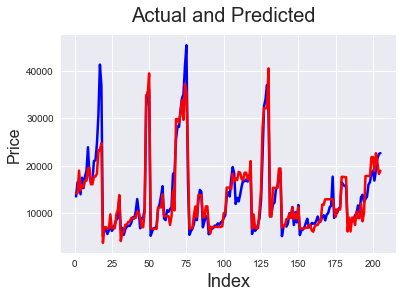

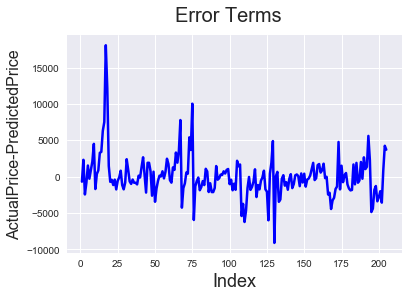

In [74]:
prediction_results(lm_19,X,y)

<b> Observation:</b>
    1. the p-value of wheelbase is close to 0 and the p-value of highwaympg has increased to 0.66 and rwd has increased to 0.07. 
    2. The VIF value of wheenbase is high
    3. Adj R-squared value has increased from 0.85 to 0.86

#### Model: 20 - remove wheelbase variable

In [75]:
# linear regression model with  horsepower, top10make, top3make, highwaympg, rwd
X = car_df[['horsepower','top10make','top3make','highwaympg','rwd']]

y = car['price']

lm_20 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     242.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.52e-82
Time:                        14:40:57   Log-Likelihood:                -1931.8
No. Observations:                 205   AIC:                             3876.
Df Residuals:                     199   BIC:                             3896.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6834.6071   2368.229      2.886      0.0

,Var,Vif
0,horsepower,8.83
3,highwaympg,4.96
4,rwd,2.85
1,top10make,2.57
2,top3make,1.53




Mean_Squared_Error  : 8965854.551256767
RMSE                :  209.13124075515142
r_square_value      : 0.8588286409550551


(205,) (205,) 205


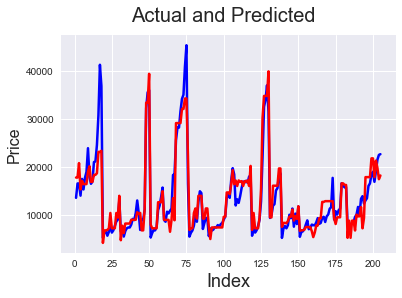

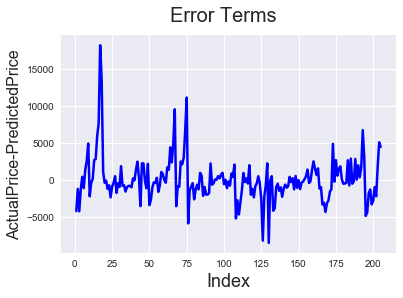

In [76]:
prediction_results(lm_20,X,y)

<b> Observation:</b>
    1. the p-value of wheelbase is close to 0 and the p-value of highwaympg has increased to 0.66 and rwd has increased to 0.07. 
    2. The VIF value of wheenbase is high
    3. Adj R-squared value has increased from 0.85 to 0.86

#### Model: 21 - add hatchback variable

In [77]:
# linear regression model with  horsepower, top10make, top3make, highwaympg, rwd, hatchback
X = car_df[['horsepower','top10make','top3make','rwd','highwaympg','hatchback']]

y = car['price']

lm_21 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     214.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.25e-84
Time:                        14:40:58   Log-Likelihood:                -1925.9
No. Observations:                 205   AIC:                             3866.
Df Residuals:                     198   BIC:                             3889.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6437.6026   2309.360      2.788      0.0

,Var,Vif
0,horsepower,9.33
4,highwaympg,5.12
3,rwd,2.85
1,top10make,2.77
5,hatchback,1.72
2,top3make,1.54




Mean_Squared_Error  : 8461563.71142436
RMSE                :  203.1647620615678
r_square_value      : 0.8667689240375058


(205,) (205,) 205


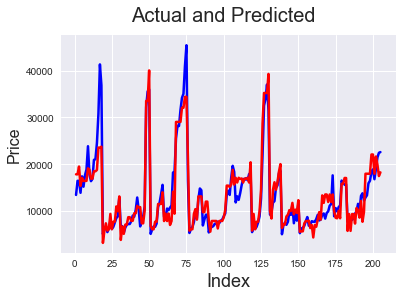

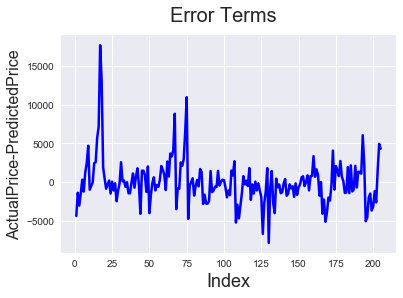

In [78]:
prediction_results(lm_21,X,y)

<b> Observation:</b>
    1. Adding hatchback, has increased the p-value of highwaympg variable.|

#### Model: 22 - remove highwaympg variable

In [79]:
# linear regression model with  horsepower, top10make, top3make, rwd
X = car_df[['horsepower','top10make','top3make','rwd','hatchback']]

y = car['price']

lm_22 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.98e-84
Time:                        14:40:58   Log-Likelihood:                -1927.7
No. Observations:                 205   AIC:                             3867.
Df Residuals:                     199   BIC:                             3887.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2224.4482    684.762      3.248      0.0

,Var,Vif
0,horsepower,3.73
1,top10make,2.72
3,rwd,2.72
4,hatchback,1.67
2,top3make,1.41




Mean_Squared_Error  : 8617316.614767497
RMSE                :  205.0260734729705
r_square_value      : 0.8643165254496807


(205,) (205,) 205


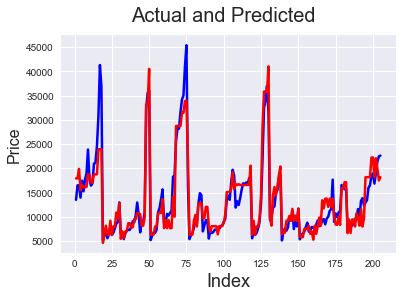

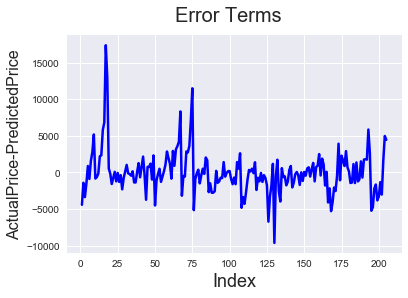

In [80]:
prediction_results(lm_22,X,y)

<b> Observation:</b>
    1. the p-value of all variables are less than 0.05.
    2. the Adj r-squared has increased to 0.86
    3. the VIF values for all the variables are also less than 5
    3. Lets use these variables ['horsepower','top10make','top3make','rwd','hatchback'] to define the model metrics

#### Model: 23 - add aspiration_std, doornumber, symboling variable

In [81]:
# linear regression model with  horsepower, top10make, top3make, rwd, hatchback, aspiration_std, doornumber,symboling
X = car_df[['horsepower','top10make','top3make','rwd','hatchback','aspiration_std','doornumber','symboling']]

y = car['price']

lm_23 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     157.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.65e-81
Time:                        14:40:59   Log-Likelihood:                -1927.1
No. Observations:                 205   AIC:                             3872.
Df Residuals:                     196   BIC:                             3902.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            943.4084   1607.772      0.

,Var,Vif
0,horsepower,13.27
6,doornumber,9.34
5,aspiration_std,5.16
3,rwd,2.96
1,top10make,2.87
7,symboling,2.21
4,hatchback,2.07
2,top3make,1.63


<b> Observation:</b>
    1. the p-value of all newly added variables are greater than 0.05. So lets remove them from the model

#### Model: 24 - add aspiration_std, doornumber, symboling variable

In [82]:
# linear regression model with  horsepower, top10make, top3make, rwd, hatchback, enginetype
X = car_df[['horsepower','top10make','top3make','rwd','hatchback','enginetype_dohc','enginetype_ohcf','enginetype_ohc','enginetype_rotor']]
# X = car_df[['horsepower','top10make','top3make','rwd','hatchback']]

y = car['price']

lm_24 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.13e-81
Time:                        14:40:59   Log-Likelihood:                -1924.9
No. Observations:                 205   AIC:                             3870.
Df Residuals:                     195   BIC:                             3903.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const             1390.8486   1058.700  

,Var,Vif
0,horsepower,8.98
7,enginetype_ohc,3.68
3,rwd,3.33
1,top10make,2.90
4,hatchback,1.77
2,top3make,1.55
5,enginetype_dohc,1.40
6,enginetype_ohcf,1.39
8,enginetype_rotor,1.24


<b> Observation:</b>
    1. the p-value of all newly added variables are greater than 0.05. So lets remove them from the model

#### Model: 25 - add remaining variables 'wagon' , 'hardtop', 'sedan', 'convertible','4wd', 'peakrpm', 'enginelocationFront', 'compressionratio',  'fueltype_gas', 

In [83]:
# linear regression model with  horsepower, top10make, top3make, rwd, hatchback, enginetype
X = car_df[['horsepower','top10make','top3make','rwd','hatchback',
           'wagon' , 'hardtop', 'sedan', 'convertible','4wd', 'peakrpm', 'enginelocationFront', 'compressionratio',  'fueltype_gas']]

y = car['price']

lm_25 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.67e-78
Time:                        14:40:59   Log-Likelihood:                -1920.0
No. Observations:                 205   AIC:                             3868.
Df Residuals:                     191   BIC:                             3915.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                1.375e+04   6

,Var,Vif
7,sedan,709.13
4,hatchback,514.52
5,wagon,183.49
6,hardtop,58.42
8,convertible,44.23
13,fueltype_gas,40.54
12,compressionratio,40.32
0,horsepower,2.63
3,rwd,2.02
1,top10make,2.00


<b> Observation:</b>
    1. the p-value of all newly added variables are greater than 0.05 except for sedan and convertible. So lets remove them from the model

#### Model: 26 - keep sedan and convertible and remove  remaining variables 'wagon' , 'hardtop', '4wd', 'peakrpm', 'enginelocationFront', 'compressionratio',  'fueltype_gas', 

In [84]:
# linear regression model with  horsepower, top10make, top3make, rwd, hatchback, enginetype
X = car_df[['horsepower','top10make','top3make','rwd','hatchback','sedan', 'convertible']]

y = car['price']

lm_26 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.64e-82
Time:                        14:40:59   Log-Likelihood:                -1926.1
No. Observations:                 205   AIC:                             3868.
Df Residuals:                     197   BIC:                             3895.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        1474.7865    816.892      1.805      

,Var,Vif
0,horsepower,7.54
3,rwd,2.82
5,sedan,2.79
1,top10make,2.72
4,hatchback,2.58
2,top3make,1.54
6,convertible,1.15


<b> Observation:</b>
    1. the p-value of hatchback, sedan, convertible is greater than 0.05. But the VIF value are comparitively low
    2. convertible has the VIF value lower compared to sedan and hatchback. So lets keep that variable

#### Model: 27 - keep convertible and remove  sedan and hatchback

In [85]:
# linear regression model with  horsepower, top10make, top3make, rwd, hatchback, enginetype
X = car_df[['horsepower','top10make','top3make','rwd', 'convertible']]

y = car['price']

lm_27 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     236.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.06e-81
Time:                        14:40:59   Log-Likelihood:                -1933.8
No. Observations:                 205   AIC:                             3880.
Df Residuals:                     199   BIC:                             3900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        1821.3546    697.327      2.612      

,Var,Vif
3,rwd,2.74
1,top10make,2.48
0,horsepower,2.42
2,top3make,1.40
4,convertible,1.07


<b> Observation:</b>
    1. the p-value of convertible is greater than 0.05. But the VIF value are comparitively low
    2. Adj R-squared value has reduced from 0.86 to 0.85
    3. the model with hatchback had a higher value of Adj R-squared. So lets remove converible and keep hatchback variable

#### Model: 28 - keep hatchback and remove  convertible

In [86]:
# linear regression model with  horsepower, top10make, top3make, rwd, hatchback, enginetype
X = car_df[['horsepower','top10make','top3make','rwd', 'hatchback']]

y = car['price']

lm_28 = linear_regression(X,y)

vif_cal(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.98e-84
Time:                        14:40:59   Log-Likelihood:                -1927.7
No. Observations:                 205   AIC:                             3867.
Df Residuals:                     199   BIC:                             3887.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2224.4482    684.762      3.248      0.0

,Var,Vif
0,horsepower,3.73
1,top10make,2.72
3,rwd,2.72
4,hatchback,1.67
2,top3make,1.41


<b> Observation:</b>
    1. Adj R-squared value 0.86
    2. All the p-values are less than 0.05 and all the VIFs are less than 4

### Linear Regression Model for car price

Selected variables based on the above analysis are 
1. horsepower
2. top10make
3. top3make
4. rwd
5. hatchback

In [87]:
# Splitting data into train test
X = car_df[['horsepower','top10make','top3make','rwd','hatchback']] # variables selected from above OLS models

y = car_df['price']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

/Applications/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [88]:
lm_final = linear_regression(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     168.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.24e-56
Time:                        14:40:59   Log-Likelihood:                -1343.6
No. Observations:                 143   AIC:                             2699.
Df Residuals:                     137   BIC:                             2717.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2196.7725    801.299      2.742      0.0



Mean_Squared_Error  : 9856037.20856317
RMSE                :  398.70834211689066
r_square_value      : 0.8592579697851774


(62,) (62,) 62


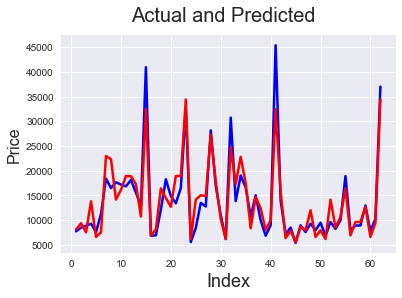

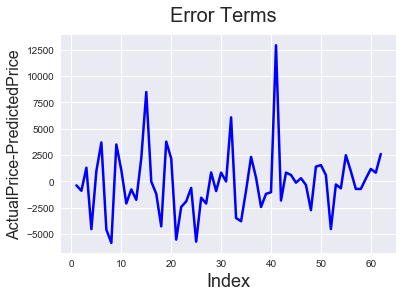

In [89]:
prediction_results(lm_final,X_test,y_test)

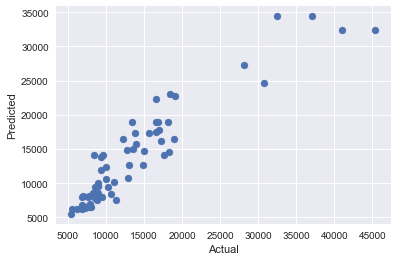

In [90]:
actualVsPredicted(lm_final,X_test,y_test)